In [ ]:
import pandas as pd

df = pd.read_csv('../data/csv/stock_prices.csv')
print(df.columns) # Has no adjusted close, so we just use close
print(df.head(3)) 


Index(['Price', 'Close', 'Close.1', 'Close.2', 'Close.3', 'High', 'High.1',
       'High.2', 'High.3', 'Low', 'Low.1', 'Low.2', 'Low.3', 'Open', 'Open.1',
       'Open.2', 'Open.3', 'Volume', 'Volume.1', 'Volume.2', 'Volume.3'],
      dtype='object')
        Price              Close            Close.1            Close.2  \
0      Ticker               AAPL               GOOG               NVDA   
1        Date                NaN                NaN                NaN   
2  2020-01-02  72.53852081298828  67.90381622314453  5.971410274505615   

             Close.3               High            High.1             High.2  \
0               TSLA               AAPL              GOOG               NVDA   
1                NaN                NaN               NaN                NaN   
2  28.68400001525879  72.59889913772518  67.9420524872171  5.971410274505615   

               High.3                Low  ...               Low.2  \
0                TSLA               AAPL  ...                N

In [ ]:
df = df.rename(columns={"Price": "Date"})



for num, ticker in zip(("", ".1", ".2", ".3"), ("AAPL", "GOOG", "NVDA", "TSLA")): # Rename all column names
    df = df.rename(columns={colName: f"{ticker}_{colName if not num else colName[0:-2]}" for colName in [f"Close{num}", f"High{num}", f"Low{num}", f"Open{num}", f"Volume{num}"]})

print(df)

df = df.drop([0,1])  # remove junk rows
df = df.reset_index(drop=True)



            Date          AAPL_Close          GOOG_Close          NVDA_Close  \
0         Ticker                AAPL                GOOG                NVDA   
1           Date                 NaN                 NaN                 NaN   
2     2020-01-02   72.53852081298828   67.90381622314453   5.971410274505615   
3     2020-01-03   71.83328247070312   67.57058715820312   5.875832557678223   
4     2020-01-06   72.40568542480469   69.23668670654297   5.900472164154053   
...          ...                 ...                 ...                 ...   
1255  2024-12-24   257.2866516113281  196.93223571777344  140.18946838378906   
1256  2024-12-26   258.1037292480469   196.4637451171875  139.89952087402344   
1257  2024-12-27  254.68588256835938   193.4136199951172  136.98016357421875   
1258  2024-12-30  251.30787658691406  192.06797790527344  137.46005249023438   
1259  2024-12-31      249.5341796875   189.8252410888672  134.26075744628906   

             TESLA_Close           AAPL

In [ ]:
df["Date"] = pd.to_datetime(df["Date"]) # Make the dates the index
df = df.set_index("Date")

print(df.head(3))
df.isna().sum() # resulting dataframe is organized and free of NaNs, now we can begin EDA

In [ ]:
df = df.apply(pd.to_numeric, errors='coerce') # convert all price rows to float64

In [ ]:
# Quickly save

df.to_csv('../data/csv/stock_prices.csv')
df.to_parquet('../data/parquet/stock_prices.parquet', engine='fastparquet')


In [141]:
import numpy as np

close = df[["AAPL_Close", "GOOG_Close", "NVDA_Close", "TSLA_Close"]]


returns = close.pct_change().dropna() # Simple returns used for easily interpreted measurements day over day gains
log_returns = (close / close.shift(1)).apply(np.log).dropna() # Log returns more suitable for statistical modeling and analysis



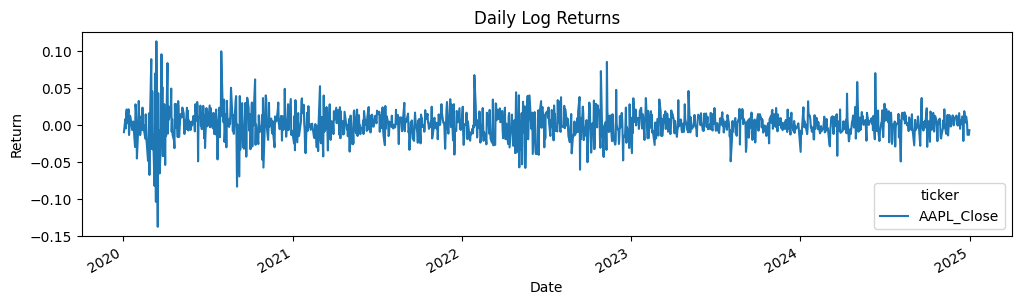

In [ ]:
import matplotlib.pyplot as plt

aapl_log_returns = log_returns['AAPL_Close']
aapl_log_returns.plot(figsize=(12,3))
plt.title("Daily Log Returns")

plt.xlabel("Date")
plt.ylabel("Return")
plt.legend(title="ticker") 
plt.savefig('../plots/DailyLogReturns.png', dpi=300)
plt.show()


# Returns Plot Analysis

The plot shows volatility in the expected periods (Covid pandemic 2020 Q1, High inflationary period 2022-2023). Would be interesting to see the market data in 2025 considering all the effects all of recent policy changes could have.

/var/folders/z0/jl3f028x0cndpkr8tkqdw7040000gn/T/ipykernel_94148/1554988729.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text('2025-01-01', cumulative_returns[ticker][-1], f'{cumulative_returns[ticker][-1]:.2f}', ha='left')


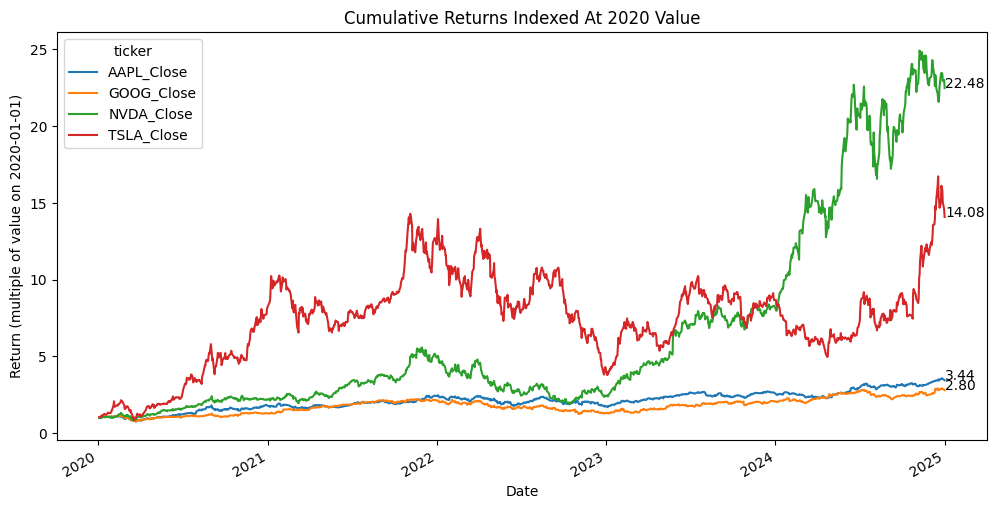

In [ ]:

cumulative_returns = (1 + returns).cumprod(axis=0)

cumulative_returns.plot(figsize=(12,6))
plt.title("Cumulative Returns Indexed At 2020 Value")

plt.xlabel("Date")
plt.ylabel("Return (multiple of value on 2020-01-01)")

plt.legend(title="ticker")

for ticker in ['AAPL_Close', 'GOOG_Close', "NVDA_Close", "TSLA_Close"]:
    plt.text('2025-01-01', cumulative_returns[ticker][-1], f'{cumulative_returns[ticker][-1]:.2f}', ha='left')


plt.savefig("../plots/CumulativeReturns.png", dpi=300)
plt.show()

# Cumulative Data analysis

As we know, big tech companies have made great gains in the past couple of years. This graph illustrates this clearly as Nvidia stock has grown to be over 22 times as valuable as it was in 2020. The explosive growth of Nvidia can be chalked up to the AI boom and excitement, being the main AI chip manufacturer, their explosive growth was inevitable

/var/folders/z0/jl3f028x0cndpkr8tkqdw7040000gn/T/ipykernel_94148/3653022823.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text('2025-01-01', real_values[ticker][-1], f'{real_values[ticker][-1]:.2f}', ha='left')


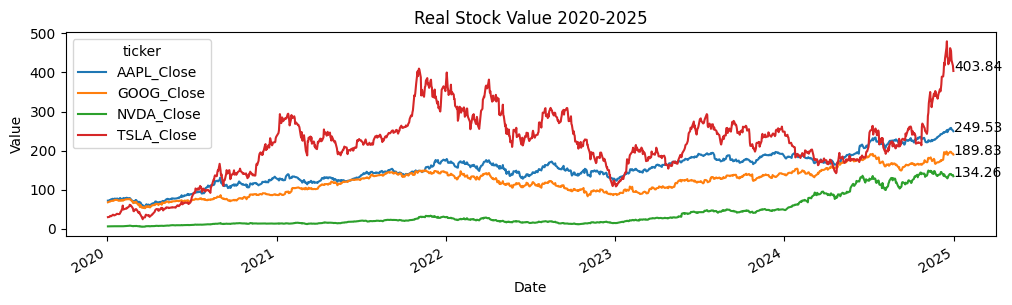

In [ ]:

real_values = cumulative_returns * close.iloc[0]

real_values.plot(figsize=(12,3))
plt.title("Real Stock Value 2020-2025")

plt.xlabel("Date")
plt.ylabel("Value")

plt.legend(title="ticker")

for ticker in ['AAPL_Close', 'GOOG_Close', "NVDA_Close", "TSLA_Close"]:
    plt.text('2025-01-01', real_values[ticker][-1], f'{real_values[ticker][-1]:.2f}', ha='left')

plt.savefig('../plots/RealStockValue.png', dpi=300)

plt.show()

,AAPL_Close,GOOG_Close,NVDA_Close,TSLA_Close
mean,0.001182,0.001026,0.003050,0.002997
standard dev.,0.019956,0.020401,0.033940,0.042320
skewness,0.105628,-0.064025,0.415478,0.212396
kurtosis,5.277819,3.559045,4.012302,3.120231


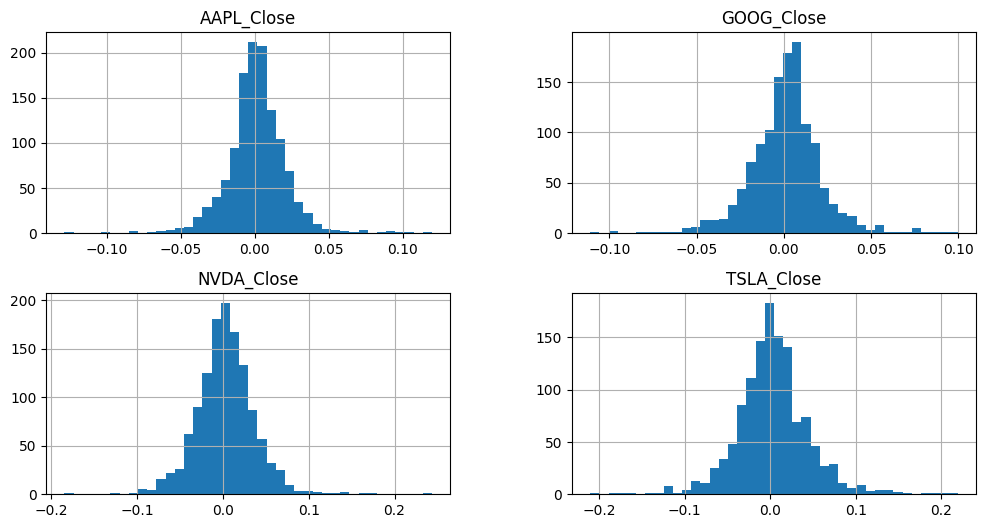

In [ ]:
distribution_data = pd.DataFrame([returns.mean(), returns.std(), returns.skew(), returns.kurtosis()], index=['mean', 'standard dev.', 'skewness', 'kurtosis'])

returns.hist(figsize=(12,6),bins=40)
plt.savefig('../plots/ReturnsHistogram.png', dpi=300)
distribution_data.to_csv("../data/csv/stock_distributions.csv")
distribution_data

# Distribution Analysis

The data shows that Google and Apple had the least volatile stock (expected since they were more highly established), and tesla and nvidia had a bit higher volatility. Interestingly enough, Google's distribution is skewed right, meaning it was more likely to lose value on any particular day than gain. Similarly interesting, Apple's stock had a highest share of outliers despite having the lowest overall volatility.

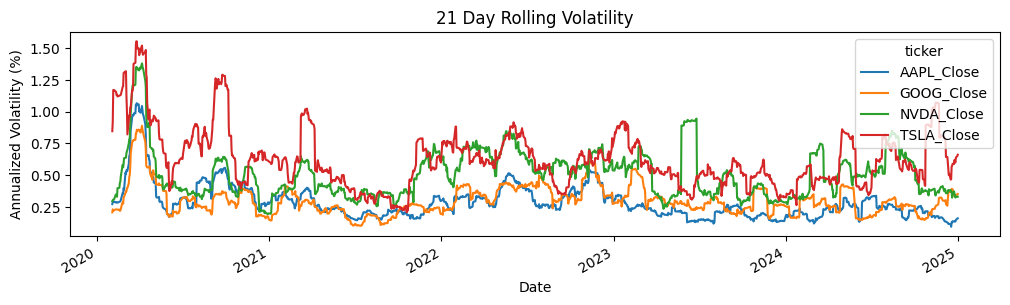

In [ ]:
rolling_volatility = returns.rolling(21).std() * (252 ** 0.5) # Rolling 3 week windows of volatility (multiplying by sqrt(252) to get annualized percentage)

rolling_volatility.plot(figsize=(12,3))
plt.title("21 Day Rolling Volatility")
plt.xlabel("Date")
plt.ylabel("Annualized Volatility (%)")

plt.legend(title="ticker")

plt.savefig("../plots/RollingVolatility.png", dpi=300)
plt.show()

# Volatility Clustering Analysis

The rolling volatility plot shows that volatility was highest during covid (expected) and was highest among Tesla and Nvidia throughout 2020-2025. Tesla clearly has the most periods of high volatility, which may not have been clear from some of the other data we examined. Apple and Google far and away remain the most stable of these 4 stocks, having low volatility throughout the time period.

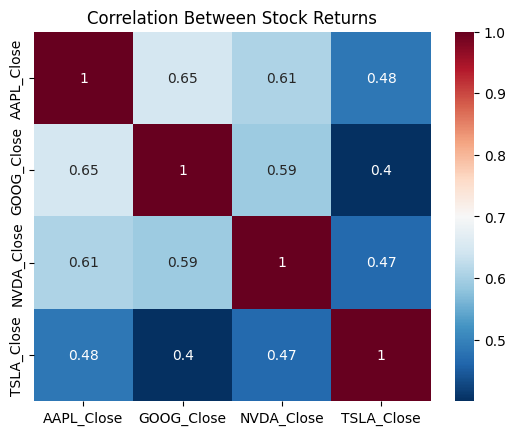

In [ ]:
import seaborn as sns

corr = returns.corr()

sns.heatmap(corr, annot=True, cmap="RdBu_r")
plt.title('Correlation Between Stock Returns')
plt.savefig("../plots/ReturnCorrelation.png", dpi=300)
plt.show()

# Analysis

Being in the tech industry, all of these stocks will be relatively correlated, but there are still valuable trends within this data. The more established tech giants tended to correlate more highly with each other, Apple and Google having the highest correlation. Meanwhile tesla didn't correlate highly with any other stock.

In [ ]:
print(returns['AAPL_Close'].autocorr(lag=1)) # Evaluate independence of returns between days, correlation is near zero

from statsmodels.tsa.stattools import adfuller

print(adfuller(returns['AAPL_Close'])) # Ensure that returns are stationary with time. P-value is very small and test statistic very negative, so returns are stationary

-0.11257656915858791
(np.float64(-11.35289988472085), np.float64(9.894555341237819e-21), 8, 1248, {'1%': np.float64(-3.4356006420838963), '5%': np.float64(-2.8638586845641063), '10%': np.float64(-2.5680044958343604)}, np.float64(-6181.390183315389))


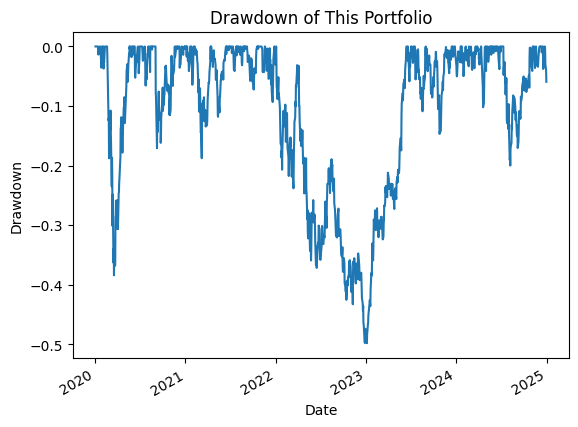

np.float64(-0.49793773623784277)

In [ ]:
# Evaluating Drawdown
# Drawdown is important for measuring investor risk. Measures the amount that the portfolio has fallen since its last high
# The maximum drawdown of this portfolio is nearly 50 percent, meaning despite strong growth overall, there is still is a high risk factor

nav = (1 + returns.mean(axis=1)).cumprod()
running_max = nav.cummax()
drawdown = nav / running_max - 1
drawdown.plot()

plt.title("Drawdown of This Portfolio")
plt.xlabel("Date")
plt.ylabel("Drawdown")

plt.savefig('../plots/Drawdown.png', dpi=300)
plt.show()

max_drawdown = drawdown.min()
max_drawdown

In [ ]:
# Liquidity Measurement
# All stocks showing high volume, especially nvidia

df[[c for c in df.columns if "Volume" in c]].mean()

AAPL_Volume    9.057103e+07
GOOG_Volume    2.741160e+07
NVDA_Volume    4.467728e+08
TSLA_Volume    1.255368e+08
dtype: float64

In [ ]:
returns['day_of_week'] = returns.index.dayofweek # group by day of week, mondays not showing as much weakness as you would expect. Thursdays actually the weakest.
returns.groupby('day_of_week').mean()


,AAPL_Close,GOOG_Close,NVDA_Close,TSLA_Close
day_of_week,,,,
0,0.002772,0.000770,0.005142,0.011086
1,0.001785,0.001478,0.003041,0.003716
2,0.000841,0.001453,0.002137,0.001452
3,-0.000240,0.000709,0.004748,-0.000778
4,0.000872,0.000681,0.000347,0.000164


In [ ]:
z = (returns - returns.mean()) / returns.std() # get z scores for each return value
outliers = (z.abs() > 4).astype(int).sort_values(ascending=False, by='AAPL_Close') # Check for outliers
print(outliers)

# There do seem to be some outliers, but they are in 2020 right around the pandemic. They seem to be real events, not bad data, so we will keep them in to diversify data.


            AAPL_Close  GOOG_Close  NVDA_Close  TSLA_Close  day_of_week
Date                                                                   
2020-03-09           1           0           0           0            0
2020-03-12           1           1           0           0            0
2020-09-03           1           0           0           0            0
2020-03-13           1           1           0           0            0
2020-03-16           1           1           1           1            0
...                ...         ...         ...         ...          ...
2021-09-09           0           0           0           0            0
2021-09-08           0           0           0           0            0
2021-09-07           0           0           0           0            0
2021-09-03           0           0           0           0            0
2024-12-31           0           0           0           0            0

[1257 rows x 5 columns]


In [ ]:
returns.to_parquet('../data/parquet/returns.parquet', engine='fastparquet')